### Data preprocessing:
it is process of cleaning dataset for getting desired output

# data problems:
* missing data
* duplicate data
* insufficient data
* too much data
* outliers

In [35]:
d={'sno':[101,102,103,104,105],
  'sname':['a','b','c','d','e'],
  'sage':['?',20,30,40,'?'],
  'smarks':[50,'?','?',60,55]}
d

{'sno': [101, 102, 103, 104, 105],
 'sname': ['a', 'b', 'c', 'd', 'e'],
 'sage': ['?', 20, 30, 40, '?'],
 'smarks': [50, '?', '?', 60, 55]}

In [36]:
df.replace('?',np.nan,inplace=True)
df

,sno,sname,sage,smarks
0,101,a,NaN,50.0
1,102,b,20.0,NaN
2,103,NaN,30.0,NaN
3,104,d,40.0,60.0
4,105,e,NaN,55.0


In [37]:
import pandas as pd
import numpy as np
df=pd.DataFrame(d)
df

,sno,sname,sage,smarks
0,101,a,?,50
1,102,b,20,?
2,103,c,30,?
3,104,d,40,60
4,105,e,?,55


In [26]:
df.isnull()

,sno,sname,sage,smarks
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [38]:
df.replace('?',np.nan)

,sno,sname,sage,smarks
0,101,a,NaN,50.0
1,102,b,20.0,NaN
2,103,c,30.0,NaN
3,104,d,40.0,60.0
4,105,e,NaN,55.0


In [40]:
df.isnull().sum().sum()

0

In [41]:
df.isnull().sum()

sno       0
sname     0
sage      0
smarks    0
dtype: int64

In [31]:
df.isnull().any(axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [32]:
df.isna().sum()

sno       0
sname     0
sage      0
smarks    0
dtype: int64

In [34]:
df.dropna()

,sno,sname,sage,smarks
0,101,a,?,50
1,102,b,20,?
2,103,?,30,?
3,104,d,40,60
4,105,e,?,55


### missing values:

fill the missing values by using three ways:

* replace
* dropna() : it is delete the null values rows
* fillna() : it is used to fill the null values data using mean,median,std and constant


In [22]:
df

,sno,sname,sage,smarks
0,101,a,?,50
1,102,b,20,?
2,103,?,30,?
3,104,d,40,60
4,105,e,?,55


In [23]:
df['sname']=df['sname'].fillna('nodata')
df

,sno,sname,sage,smarks
0,101,a,?,50
1,102,b,20,?
2,103,?,30,?
3,104,d,40,60
4,105,e,?,55


In [52]:
d={'sno':[110,101,101,102,102,103,104,110],
  'sname':['k','a','a','b','b','c','d','k']}
df=pd.DataFrame(d)
df

,sno,sname
0,110,k
1,101,a
2,101,a
3,102,b
4,102,b
5,103,c
6,104,d
7,110,k


In [53]:
df.duplicated()

0    False
1    False
2     True
3    False
4     True
5    False
6    False
7     True
dtype: bool

In [62]:
df[df.duplicated()]

,sno,sname
2,101,a
4,102,b
7,110,k


In [64]:
df.drop_duplicates(inplace=True)
df

,sno,sname
0,110,k
1,101,a
3,102,b
5,103,c
6,104,d


In [67]:
d={'sno':["10","20","30","40","50"],
  'year':['2000]','[2001','2001-2005','#2010','2011#']}
df=pd.DataFrame(d)
df

,sno,year
0,10,2000]
1,20,[2001
2,30,2001-2005
3,40,#2010
4,50,2011#


In [68]:
df.dtypes

sno     object
year    object
dtype: object

In [71]:
df['year']=df['year'].str.extract('([a-zA-Z0-9]{4})',expand=False)

In [72]:
df

,sno,year
0,10,2000
1,20,2001
2,30,2001
3,40,2010
4,50,2011


### outliers

outliers means some data points that are away from the other data points

* standardScalar(standization)
* tobot scaling
* data Range(MinMaxScalar)
* normalization

ex: l=[10,12,15,9,520,20,22,27,500] 
    
here,520 and 500 =>n outliers

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [77]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   15.6
10    66.1    5.8       24.2   12.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2   13.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21   237.4    5.1       23.5   17.5
22    13.2   15.9       49.6    5.6
23   228.3   16.9       26.2   20.5
24    62.3   12.6       18.3    9.7
25   262.9    3.5       19.5   1

In [79]:
df['TV'].mean()

147.0425

In [80]:
df['TV'].median()

149.75

In [81]:
df['TV'].mean()

0.7

In [82]:
df['TV'].max()

296.4

In [83]:
df.sum()

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         3026.1
dtype: float64

In [84]:
df.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [85]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [86]:
df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [87]:
df.sample()

,TV,Radio,Newspaper,Sales
99,135.2,41.7,45.9,17.2


In [88]:
df.sample(4)

,TV,Radio,Newspaper,Sales
50,199.8,3.1,34.6,16.4
173,168.4,7.1,12.8,16.7
161,85.7,35.8,49.3,13.3
164,117.2,14.7,5.4,11.9


In [89]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


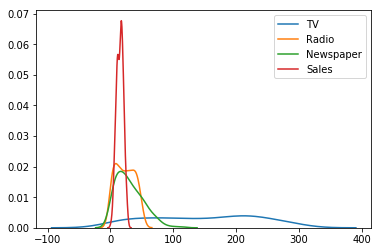

In [90]:
sns.kdeplot(df['TV'])
sns.kdeplot(df['Radio'])
sns.kdeplot(df['Newspaper'])
sns.kdeplot(df['Sales'])

### Standard Scaler

standard scaler is a data preprocessing algorithm for arrange the all data points into one range

it use the mean and median values for scaling


In [94]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
scaledata=s.fit_transform(df)
scaledata

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.32231867e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -8.97514665e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -5.93947713e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         2.59834337e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
         5.25455420e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.50464857e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -6.31893582e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -3.66272500e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.95999899e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
         8.90779273e-02],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -4.80110107e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [98]:
s_df=pd.DataFrame(scaledata,columns=df.columns)
s_df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


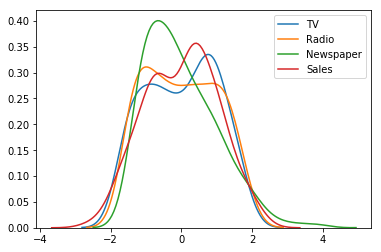

In [99]:
sns.kdeplot(s_df['TV'])
sns.kdeplot(s_df['Radio'])
sns.kdeplot(s_df['Newspaper'])
sns.kdeplot(s_df['Sales'])

### robust Scalling:

it use the median and IQR for scalling the data

In [101]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [102]:
from sklearn.preprocessing import RobustScaler
r=RobustScaler()
r_data=r.fit_transform(df)
r_df=pd.DataFrame(r_data,columns=df.columns)
r_df.head()

,TV,Radio,Newspaper,Sales
0,0.556248,0.561205,1.343122,0.757764
1,-0.728626,0.617702,0.598145,-0.695652
2,-0.917619,0.866290,1.346213,-0.496894
3,0.012115,0.693032,1.012365,0.062112
4,0.214953,-0.455744,1.009274,0.236025


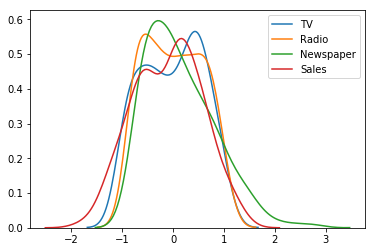

In [103]:
sns.kdeplot(r_df['TV'])
sns.kdeplot(r_df['Radio'])
sns.kdeplot(r_df['Newspaper'])
sns.kdeplot(r_df['Sales'])

In [104]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [108]:
from sklearn.preprocessing import Normalizer
n=Normalizer()
n_data=n.fit_transform(df)
n_df=pd.DataFrame(n_data,columns=df.columns)
n_df.head()

,TV,Radio,Newspaper,Sales
0,0.942116,0.154767,0.283331,0.090486
1,0.591135,0.522059,0.599106,0.138153
2,0.200637,0.535420,0.808379,0.139979
3,0.899741,0.245276,0.347425,0.097992
4,0.945881,0.056502,0.305528,0.093646


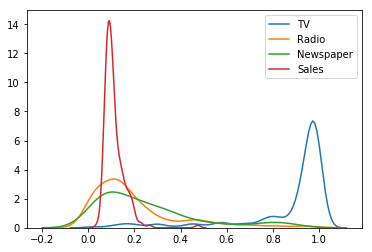

In [109]:
sns.kdeplot(n_df['TV'])
sns.kdeplot(n_df['Radio'])
sns.kdeplot(n_df['Newspaper'])
sns.kdeplot(n_df['Sales'])

In [110]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler(feature_range=(-1,1))
m_data=n.fit_transform(df)
m_df=pd.DataFrame(n_data,columns=df.columns)
m_df.head()

,TV,Radio,Newspaper,Sales
0,0.942116,0.154767,0.283331,0.090486
1,0.591135,0.522059,0.599106,0.138153
2,0.200637,0.535420,0.808379,0.139979
3,0.899741,0.245276,0.347425,0.097992
4,0.945881,0.056502,0.305528,0.093646


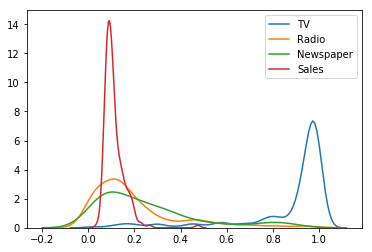

In [111]:
sns.kdeplot(m_df['TV'])
sns.kdeplot(m_df['Radio'])
sns.kdeplot(m_df['Newspaper'])
sns.kdeplot(m_df['Sales'])

In [112]:
d={'sno':[101,102,103,104,105,106],
  'sname':['a','b','c','d','e','f'],
  'gender':['male','female','male','male','female','female']
  }
df=pd.DataFrame(d)

In [113]:
df

,sno,sname,gender
0,101,a,male
1,102,b,female
2,103,c,male
3,104,d,male
4,105,e,female
5,106,f,female


In [116]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['gender2']=l.fit_transform(df['gender'])
df

,sno,sname,gender,gender2
0,101,a,male,1
1,102,b,female,0
2,103,c,male,1
3,104,d,male,1
4,105,e,female,0
5,106,f,female,0


In [117]:
df=pd.read_csv('automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


In [118]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [119]:
df['normalized-losses'].str.isnumeric().value_counts()

True     164
False     41
Name: normalized-losses, dtype: int64

In [120]:
'string'.isnumeric()

False

In [121]:
'27'.isnumeric()

True

In [123]:
df['normalized-losses'].loc[df['normalized-losses'].str.isnumeric()==False]

0      ?
1      ?
2      ?
5      ?
7      ?
9      ?
14     ?
15     ?
16     ?
17     ?
43     ?
44     ?
45     ?
46     ?
48     ?
49     ?
63     ?
66     ?
71     ?
73     ?
74     ?
75     ?
82     ?
83     ?
84     ?
109    ?
110    ?
113    ?
114    ?
124    ?
126    ?
127    ?
128    ?
129    ?
130    ?
131    ?
181    ?
189    ?
191    ?
192    ?
193    ?
Name: normalized-losses, dtype: object

In [124]:
df.replace("?",np.nan,inplace=True)

In [127]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [128]:
df['normalized-losses']=pd.to_numeric(df['normalized-losses'])
df['price']=pd.to_numeric(df['price'])
df['horsepower']=pd.to_numeric(df['horsepower'])
df['stroke']=pd.to_numeric(df['stroke'])


In [132]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].mean())
df['price']=df['price'].fillna(df['price'].mean())
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())
df['stroke']=df['stroke'].fillna(df['stroke'].mean())


TypeError: can only concatenate str (not "int") to str